# 🤖 Clasificador de Clientes
Este notebook entrena un modelo de clasificación para segmentar a los clientes según su comportamiento de compra.

In [3]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
sns.set(style='whitegrid')

In [4]:
# Cargar dataset
df = pd.read_csv('../data/clientes.csv')
df.head()

,Cliente,FrecuenciaCompras,TotalGastado,TiempoUltimaCompra,Segmento
0,Cliente_1,7,7729,113,Regular
1,Cliente_2,20,9567,62,Regular
2,Cliente_3,29,1116,52,Casual
3,Cliente_4,15,7969,12,Regular
4,Cliente_5,11,6539,39,Regular


In [5]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Cliente             100 non-null    object
 1   FrecuenciaCompras   100 non-null    int64 
 2   TotalGastado        100 non-null    int64 
 3   TiempoUltimaCompra  100 non-null    int64 
 4   Segmento            100 non-null    object
dtypes: int64(3), object(2)
memory usage: 4.0+ KB


## 📊 Exploración de Datos

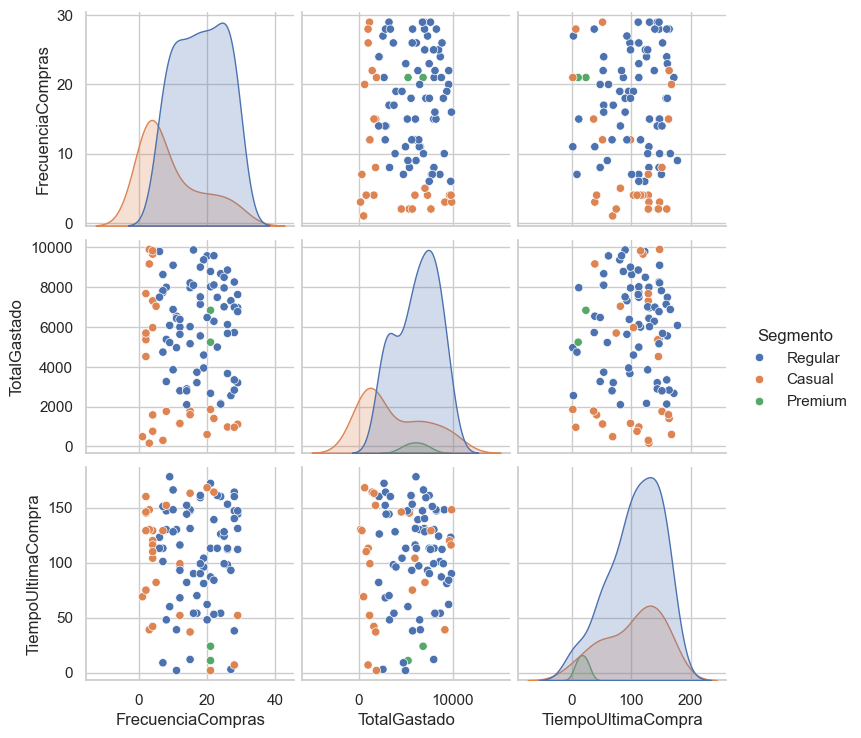

In [6]:
sns.pairplot(df, hue='Segmento')
plt.show()

## 🧹 Preprocesamiento de Datos

In [7]:
# Codificar etiquetas y escalar características numéricas
X = df[['FrecuenciaCompras', 'TotalGastado', 'TiempoUltimaCompra']]
y = df['Segmento']

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 🧠 Entrenamiento del Modelo

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 📈 Evaluación del Modelo

In [10]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=encoder.classes_))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

## ✅ Conclusión
- Revisa la precisión del modelo para cada clase.
- Puedes probar con otros clasificadores o hacer tuning de hiperparámetros.